# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#regressions
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
cities[0:5]

['souillac', 'khatanga', 'scarborough', 'te anau', 'berbera']

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
# Build query URL and request your results in Celsius
city = "khatanga"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [6]:
type(weather_json)

dict

In [7]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [8]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 71.9667, 'lon': 102.5},
 'dt': 1644209916,
 'id': 2022572,
 'main': {'feels_like': -30.93,
          'grnd_level': 1029,
          'humidity': 98,
          'pressure': 1033,
          'sea_level': 1033,
          'temp': -18.33,
          'temp_max': -18.33,
          'temp_min': -18.33},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'sunrise': 1644202555, 'sunset': 1644220342},
 'timezone': 25200,
 'visibility': 2305,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 233, 'gust': 17.11, 'speed': 9.69}}


In [9]:
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
country = weather_json["sys"]["country"]
clouds = weather_json["clouds"]["all"]

date_dt = weather_json["dt"]
city_name = weather_json["name"]
wind = weather_json["wind"]["speed"]

temp = weather_json["main"]["temp"]
pressure = weather_json["main"]["pressure"]
humidity = weather_json["main"]["humidity"]

In [10]:
humidity

98

In [11]:
cities[-10:]

['tala',
 'goderich',
 'sao domingos',
 'esna',
 'samfya',
 'ust-uda',
 'shahr-e babak',
 'campbeltown',
 'bardiyah',
 'buala']

In [12]:
650/60

10.833333333333334

In [13]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities[0:500]:
    #make the request
    print(city)
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    
    if(weather_response.status_code == 200):
    
        # get data
        weather_json = weather_response.json()

        # parse the data
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        cloudiness = weather_json["clouds"]["all"]

        date_dt = weather_json["dt"]
        city_name = weather_json["name"]
        wind = weather_json["wind"]["speed"]

        temp = weather_json["main"]["temp"]
        pressure = weather_json["main"]["pressure"]
        humidity = weather_json["main"]["humidity"]
        #slap into lists
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date_dt)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)

souillac
200

khatanga
200

scarborough
200

te anau
200

berbera
200

ancud
200

piranhas
200

tasiilaq
200

columbus
200

roma
200

fernie
200

progreso
200

port alfred
200

vostok
200

sohbatpur
200

hermanus
200

kalabo
200

jamestown
200

atuona
200

beringovskiy
200

caucaia
200

busselton
200

namibe
200

lompoc
200

ushuaia
200

adamas
200

hofn
200

muros
200

vaini
200

mataura
200

byron bay
200

tuktoyaktuk
200

punta arenas
200

dikson
200

rikitea
200

bisho
200

nikolskoye
200

barentsburg
404

nuuk
200

amderma
404

laguna
200

albany
200

turtas
200

sao joao da barra
200

aksha
200

thompson
200

mbour
200

savannah bight
200

cape town
200

waddan
200

kapaa
200

yumen
200

salalah
200

nouadhibou
200

sao luis de montes belos
200

taoudenni
200

faanui
200

bluff
200

ribeira grande
200

belushya guba
404

chipinge
200

rio grande
200

lorengau
200

raichur
200

ilulissat
200

barrow
200

quelimane
200

sulangan
200

qaanaaq
200

carnarvon
200

keetmanshoop
200

sa

In [19]:
weather_df = pd.DataFrame()

weather_df["City"] = names
weather_df["Country"] = countries
weather_df["Latitude"] = lats
weather_df["Longitude"] = lngs
weather_df["Date"] = dates
weather_df["Wind_Speed"] = winds
weather_df["Pressure"] = pressures
weather_df["Humidity"] = humids
weather_df["Temperature"] = temps
weather_df["Cloudiness"] = clouds

weather_df.head(190)

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Souillac,MU,-20.5167,57.5167,1644209979,10.87,1013,75,81.36,100
1,Khatanga,RU,71.9667,102.5000,1644209916,9.69,1033,98,-18.33,100
2,Scarborough,GB,54.2797,-0.4044,1644209979,1.99,1019,80,33.39,9
3,Te Anau,NZ,-45.4167,167.7167,1644209980,2.33,1017,41,71.38,23
4,Berbera,SO,10.4396,45.0143,1644209980,3.53,1015,75,77.90,69
...,...,...,...,...,...,...,...,...,...,...
185,Morón,AR,-34.6534,-58.6198,1644210122,6.71,1017,86,62.55,5
186,Danville,US,36.5860,-79.3950,1644209957,1.95,1028,70,25.92,0
187,Batagay-Alyta,RU,67.8006,130.4114,1644210124,2.24,1029,94,-21.44,100
188,Cagli,IT,43.5457,12.6527,1644210125,19.15,1008,81,48.45,87


In [22]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         463 non-null    object 
 1   Country      463 non-null    object 
 2   Latitude     463 non-null    float64
 3   Longitude    463 non-null    float64
 4   Date         463 non-null    int64  
 5   Wind_Speed   463 non-null    float64
 6   Pressure     463 non-null    int64  
 7   Humidity     463 non-null    int64  
 8   Temperature  463 non-null    float64
 9   Cloudiness   463 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 36.3+ KB


In [23]:
weather_df.to_csv("my_data.csv", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get the indices of cities that have humidity over 100%.


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [26]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         463 non-null    object 
 1   Country      463 non-null    object 
 2   Latitude     463 non-null    float64
 3   Longitude    463 non-null    float64
 4   Date         463 non-null    int64  
 5   Wind_Speed   463 non-null    float64
 6   Pressure     463 non-null    int64  
 7   Humidity     463 non-null    int64  
 8   Temperature  463 non-null    float64
 9   Cloudiness   463 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 36.3+ KB


In [27]:
weather_df.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
count,463.000000,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000
mean,20.956349,14.493076,1.644210e+09,7.928553,1015.375810,74.099352,46.130022,57.021598
std,34.505523,90.254560,1.109187e+02,7.152891,10.782442,21.114890,31.492953,39.995232
min,-54.800000,-179.166700,1.644209e+09,0.000000,965.000000,10.000000,-41.580000,0.000000
25%,-7.254850,-65.772700,1.644210e+09,3.275000,1011.000000,64.000000,24.710000,11.000000
50%,26.184200,19.934800,1.644210e+09,6.420000,1015.000000,80.000000,55.110000,69.000000
75%,50.265850,92.070150,1.644210e+09,10.680000,1022.000000,91.000000,71.735000,99.500000
max,78.218600,179.316700,1.644210e+09,64.130000,1039.000000,100.000000,94.710000,100.000000


In [31]:
mask = weather_df.Humidity <= 100
weather_df = weather_df.loc[mask].dropna().reset_index(drop=True)

In [32]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         463 non-null    object 
 1   Country      463 non-null    object 
 2   Latitude     463 non-null    float64
 3   Longitude    463 non-null    float64
 4   Date         463 non-null    int64  
 5   Wind_Speed   463 non-null    float64
 6   Pressure     463 non-null    int64  
 7   Humidity     463 non-null    int64  
 8   Temperature  463 non-null    float64
 9   Cloudiness   463 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 36.3+ KB


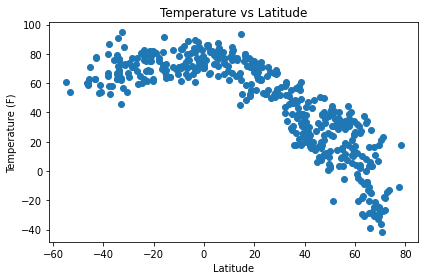

In [34]:
x_values = weather_df["Latitude"]
y_values = weather_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("temp_lat_asante.png")
plt.tight_layout()
plt.show()

As the latitude increases the temputure falls

## Latitude vs. Humidity Plot

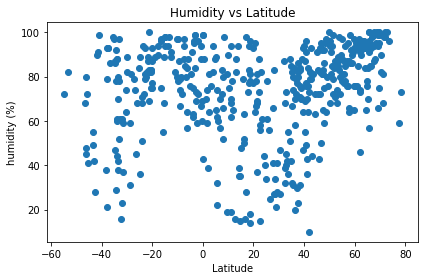

In [35]:
x_values = weather_df["Latitude"]
y_values = weather_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('humidity (%)')
plt.savefig("humid_lat_asante.png")
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

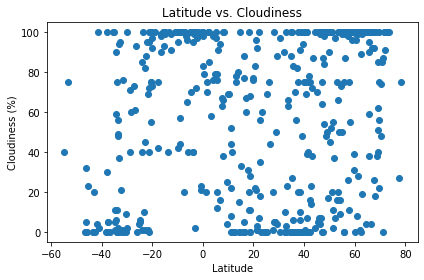

In [70]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness"]

plt.scatter(x_values,y_values)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("cloud_lat_asante.png")
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

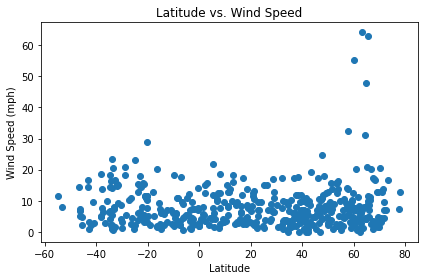

In [46]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind_Speed"]

plt.scatter(x_values,y_values)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("wind_lat_asante.png")
plt.tight_layout()
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# def linear_regression(x_values, y_values):
#     (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     correlation = st.pearsonr(x_values, y_values)
    
#     print(f"r-squared: {rvalue**2}")
#     print(f"Correlation: {correlation}")
#     print(f"Line: {line_eq}")

#     return regress_values, line_eq

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
#mask = weather_df['latitude'] > 0
#northern_hemisphere = weather_df[mask]
#southern_hemisphere = weather_df[~mask]

In [50]:
df_north = weather_df.loc[weather_df.Latitude >= 0]
df_south = weather_df.loc[weather_df.Latitude < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7742798019306375


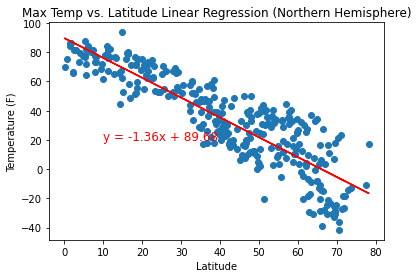

In [53]:
x_values = df_north['Latitude']
y_values = df_north['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Max Temp vs. Latitude Linear Regression (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

As the latitude increase the temperture fell

In [55]:
feature = df_north[["Latitude"]]
target = df_north["Temperature"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          7.85e-104
Time:                        23:10:58   Log-Likelihood:                -1303.1
No. Observations:                 317   AIC:                             2610.
Df Residuals:                     315   BIC:                             2618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.6850      1.878     47.752      0.000      85.990      93.380
Latitude      -1.3583      0.041    -32.871      0.000      -1.440      -1.277
==============================================================================
Omnibus:                        3.222   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.425
Skew:                          -0.051   Prob(JB):                        0.297
Kurtosis:                       2.584   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-1.35829971]
89.68496045566535


In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [61]:
actual = df_north["Temperature"]
predictions = reg.predict(df_north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.7742798019306374
MSE: 217.75151924987395
RMSE: 14.75640604110208
MAE: 12.083411527845794


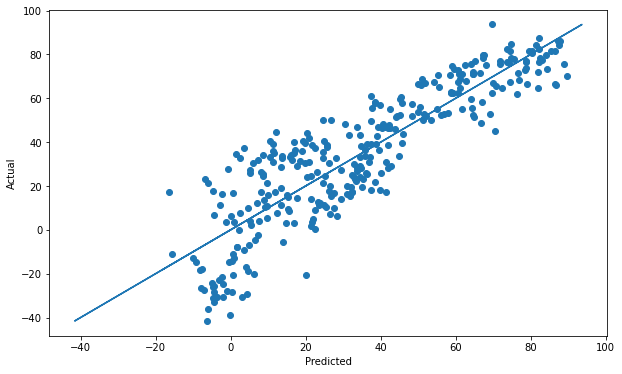

In [62]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

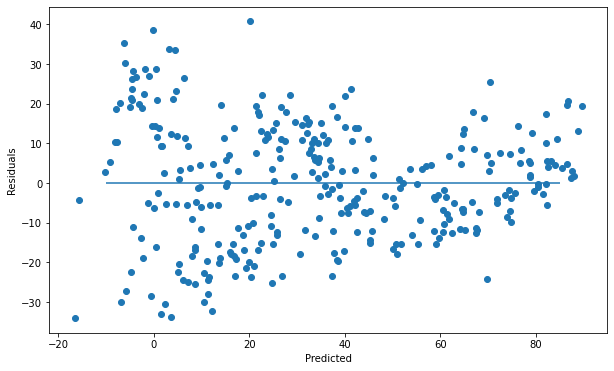

In [63]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, -10, 85)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1735533333165441


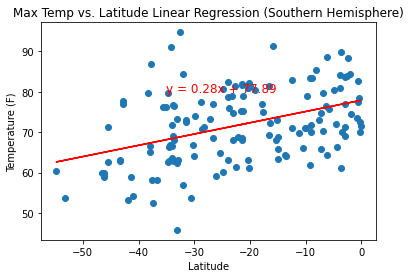

In [64]:
x_values = df_south["Latitude"]
y_values = df_south["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Max Temp vs. Latitude Linear Regression (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

tempertures seems to increase in a positive progress with latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21047436676618914


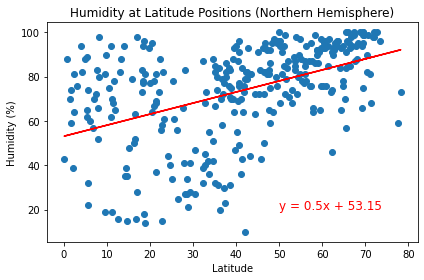

In [65]:
x_values = df_north["Latitude"]
y_values = df_north["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()

As latitude increased the humidity got higher

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12464020233337335


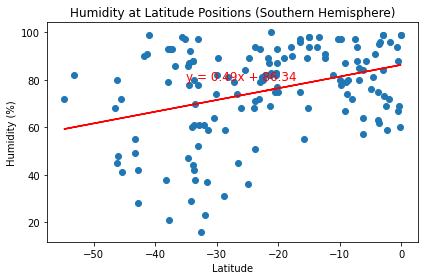

In [66]:
x_values = df_south["Latitude"]
y_values = df_south["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()

As the latitude increased the humidity got higher

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05676755250241099


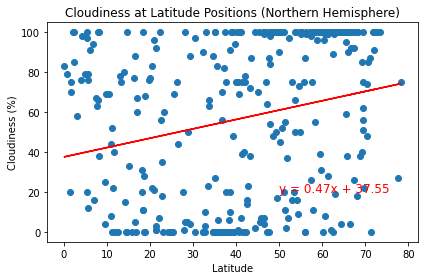

In [71]:
x_values = df_north["Latitude"]
y_values = df_north["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()

A balanced amount of clouds averaged for a higher progression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31077993779069846


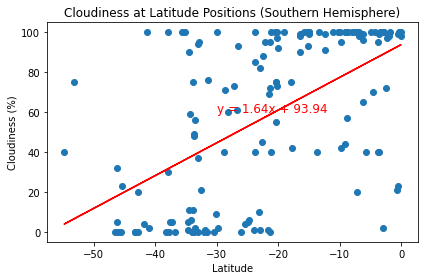

In [73]:
x_values = df_south["Latitude"]
y_values = df_south["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()

Cloudiness played a positive progression and seems to increases as latitude increased 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012218078402414814


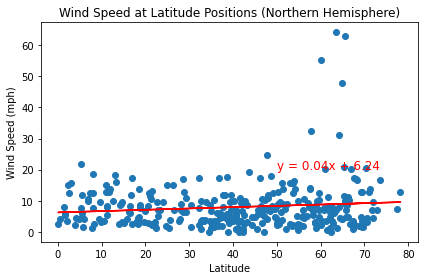

In [68]:
x_values = df_north["Latitude"]
y_values = df_north["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()

Winds speeds averaged consistently through the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.029389791186938546


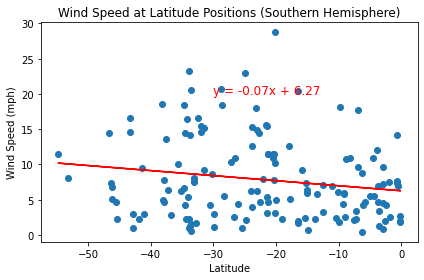

In [69]:
x_values = df_south["Latitude"]
y_values = df_south["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()

Wind speeds increased as the latitude increaseed